# Atividade 3
Aplicar a técnica de equalização de histograma local de forma a reconhecer as informações dentro das regiões escuras dos cantos da imagem, investigando o tamanho de janela que providencia melhor resultado.

### Importação de bibliotecas

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Definição das funções utilizadas

In [54]:
#função para apresentar o histograma
def histograma(X):
    vet = np.zeros((1,256), dtype=int)[0]
    for i in range(0,256):
        vet[i] = np.count_nonzero(X == i)
    
    '''fig, axs = plt.subplots()
    axs.bar(range(0,256), vet, width=1)
    axs.set_title("Histogram")
    plt.show()'''
    
    return vet

#função para equalizar histograma
def equalizarHist(img):
    vet = histograma(img)
    s = np.zeros((1,256), dtype=int)[0]
    for k in range(0,256):
        Tk = 0
        for j in range(0,k):
            pk = vet[j]/(img.shape[0] * img.shape[1])
            Tk = Tk + pk
        
        s[k] = Tk*255
        img_e = s[img.flatten()]
        im_saida = np.reshape(img_e, img.shape)
    
    return im_saida

#função para equalizar localmente
def equalizarlocal(img, size):
    imgOut = img.copy()
    i = 0
    j = 0
    while i < img.shape[0]:
        flag = False
        j = 0

        while j < img.shape[1]:
            if img[i,j]>2 and img[i,j] < 50 :
                minL, maxL, minC, maxC = 0, img.shape[0]-1, 0, img.shape[1]-1
                if i-int(np.floor(size/2)) >=0:
                    minL = i-int(np.floor(size/2))
                if i+int(np.ceil(size/2))<img.shape[0]:
                    maxL = i+int(np.ceil(size/2))
                if j-int(np.floor(size/2)) >=0:
                    minC = j-int(np.floor(size/2))
                if j+int(np.ceil(size/2))<img.shape[1]:
                    maxC = j+int(np.ceil(size/2))
                
                subI = img[minL:maxL, minC:maxC]
                sub_e = equalizarHist(subI)
                imgOut[minL:maxL, minC:maxC] = sub_e
                j = j + size-1
                flag = True
            j = j + 1
        i = i + 1
        
    return imgOut

### Execução principal

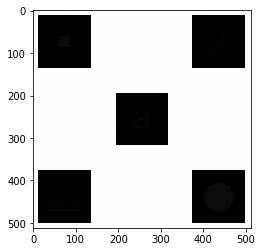

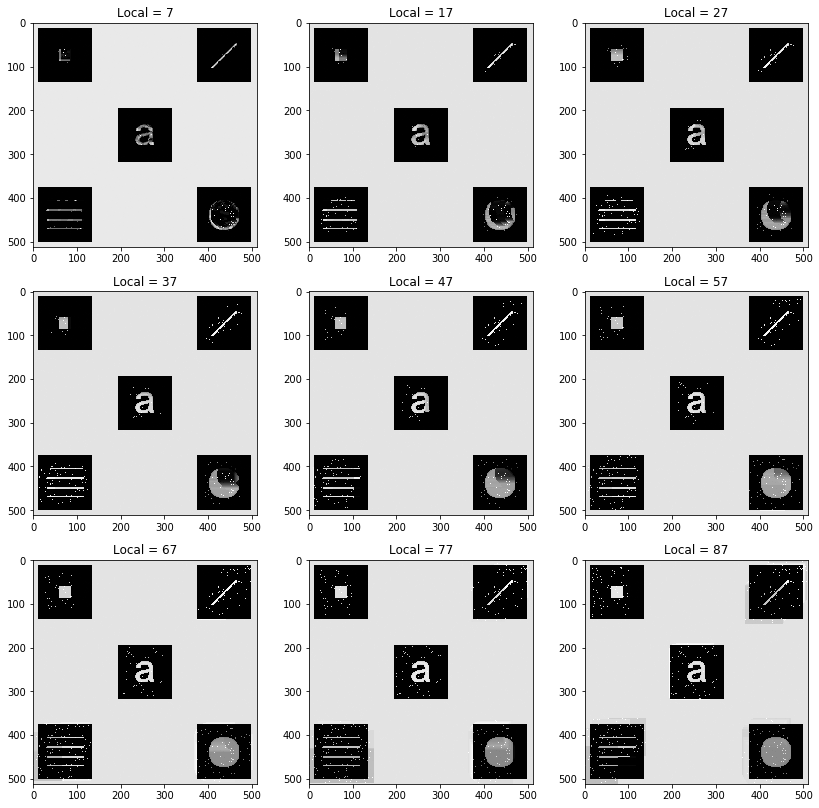

In [55]:
#leitura da imagem
img = cv2.imread('test images/quadrados.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(14)

for i in range(0, 9):
    size = 7+(i*10)
    imgE = equalizarlocal(img, size)

    title = "Local = "+str(size)

    fig.add_subplot(3,3,i+1, title=title)
    plt.imshow(imgE, cmap='gray')
    
plt.show()

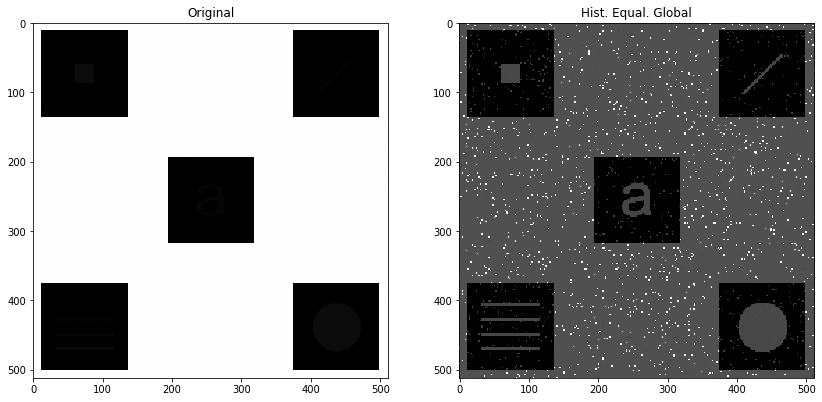

In [57]:
img = cv2.imread('test images/quadrados.tif', cv2.IMREAD_GRAYSCALE)
imgH = equalizarHist(img)

fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(14)

fig.add_subplot(1,2,1, title='Original')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2, title='Hist. Equal. Global')
plt.imshow(imgH, cmap='gray')

plt.show()
